In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv("amz_uk_price_prediction_dataset 2.csv")

**Part 1: Analyzing Best-Seller Trends Across Product Categories**
**Objective: Understand the relationship between product categories and their best-seller status.**

**1. Crosstab Analysis:**
- Create a crosstab between the product category and the isBestSeller status.
- Are there categories where being a best-seller is more prevalent?
Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [3]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [4]:
crosstab['proportion_best_sellers'] = crosstab[True] / (crosstab[True] + crosstab[False])

In [5]:
crosstab

isBestSeller,False,True,proportion_best_sellers
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [6]:
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab.iloc[:, 0:2])

#Cramér's V
n = df.shape[0]  
min_dim = min(crosstab.shape) - 1  
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

chi2_stat, p_val, cramers_v

(36540.20270061387, 0.0, 0.08646709890892415)

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [7]:
top_5_categories = crosstab.head(5)

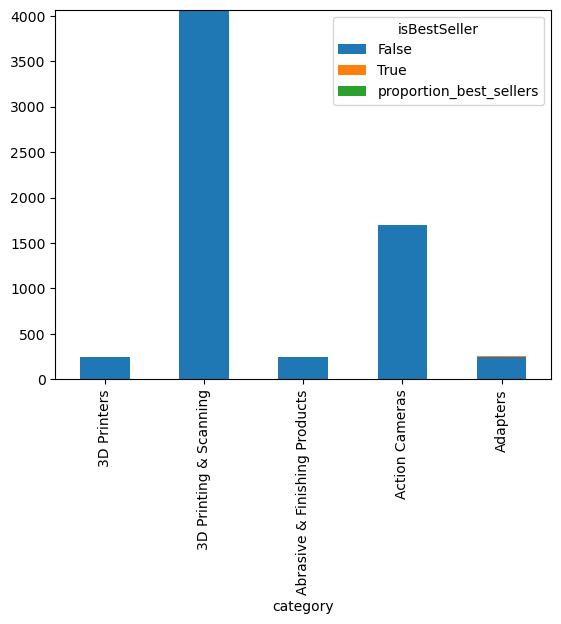

In [8]:
top_5_categories.plot(kind="bar", stacked=True);

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [11]:
before_outliers_removed = df['price'].describe()
after_outliers_removed = df_filtered['price'].describe()

before_outliers_removed, after_outliers_removed

(count    2.443651e+06
 mean     8.924381e+01
 std      3.456089e+02
 min      0.000000e+00
 25%      9.990000e+00
 50%      1.909000e+01
 75%      4.599000e+01
 max      1.000000e+05
 Name: price, dtype: float64,
 count    2.115963e+06
 mean     2.340827e+01
 std      2.051335e+01
 min      0.000000e+00
 25%      9.130000e+00
 50%      1.599000e+01
 75%      2.999000e+01
 max      9.999000e+01
 Name: price, dtype: float64)

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [12]:
median_prices_all_categories = df_filtered.groupby('category')['price'].median().sort_values(ascending=False)

median_prices_all_categories

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

In [13]:
category_counts = df_filtered['category'].value_counts()

In [14]:
top_20_categories = category_counts.nlargest(20).index

In [15]:
data_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

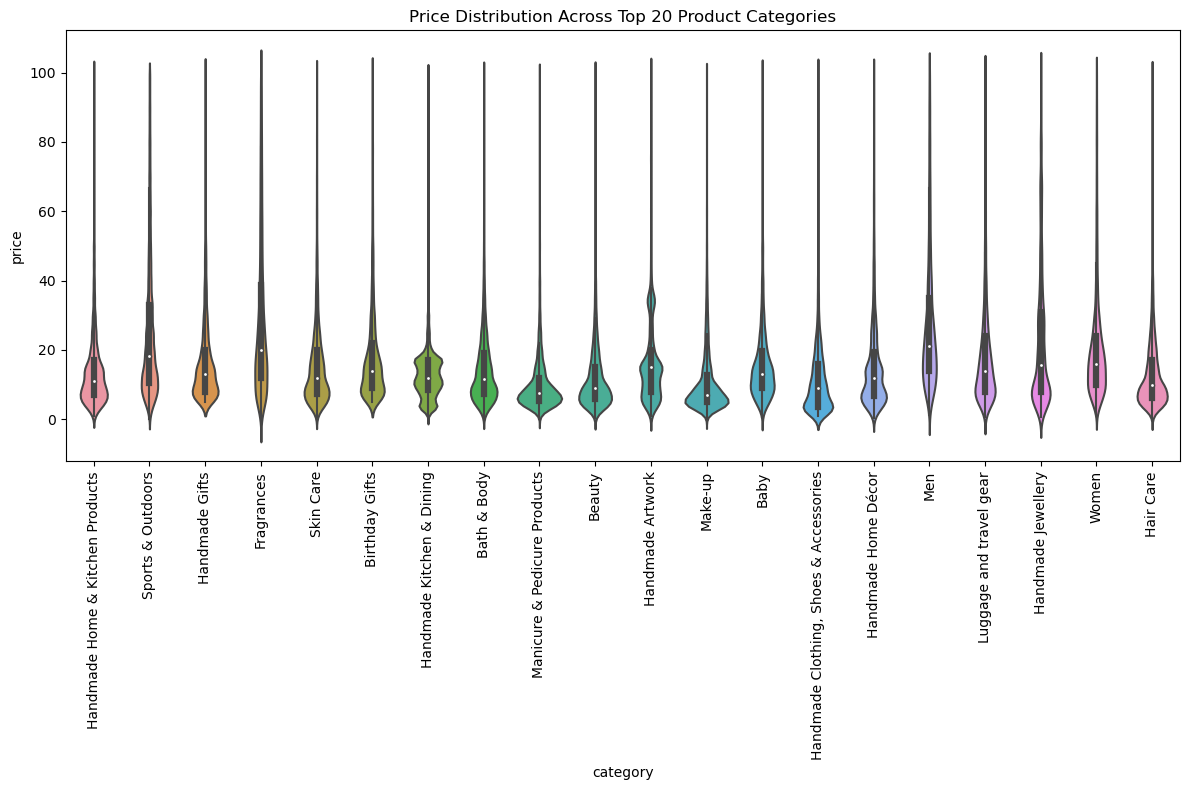

In [16]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=data_top_20)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xticks(rotation=90) 
plt.tight_layout()

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [17]:
top_10_counts = df['category'].value_counts().nlargest(10)
top_10_categories = top_10_counts.index

In [18]:
df_top_10 = df[df['category'].isin(top_10_categories)]

In [19]:
average_prices_top_10 = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

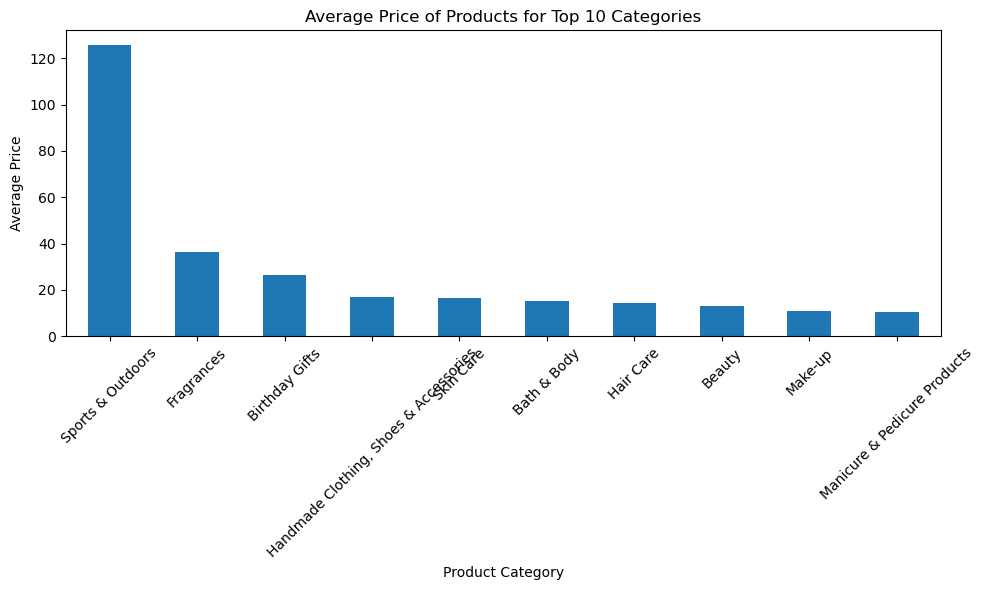

In [20]:
average_prices_top_10.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

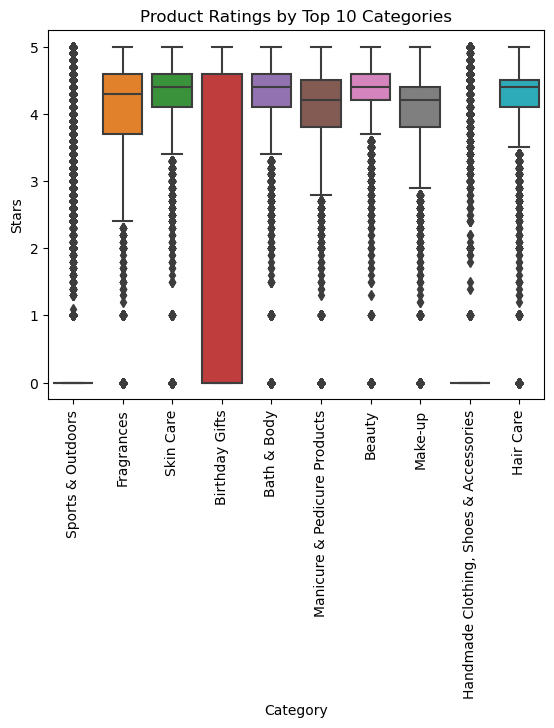

In [21]:
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.title('Product Ratings by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.xticks(rotation=90)

Based on the box plot, which shows the product ratings by top 10 categories, it appears that the "Birthday Gifts" category has the highest median rating from customers, as indicated by the median line being at the highest position compared to the other categories.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [22]:
correlation_coefficient = df['price'].corr(df['stars'])
correlation_coefficient

-0.12490673262148386

The correlation coefficient of approximately -0.125 suggests a very slight negative relationship between product price and ratings: as the price increases, there is a slight tendency for the rating to decrease. However, this is a very weak correlation and indicates that there is not a significant linear relationship between the two variables.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

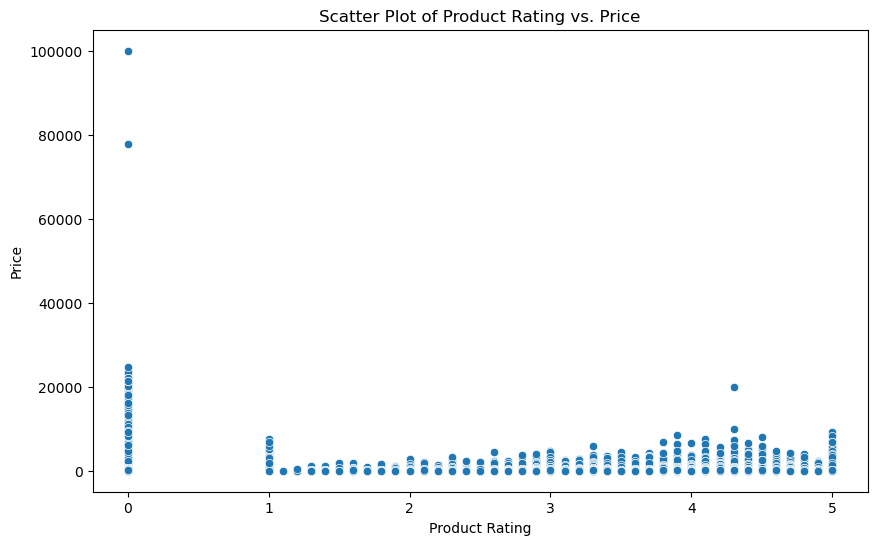

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df)
plt.title('Scatter Plot of Product Rating vs. Price')
plt.xlabel('Product Rating')
plt.ylabel('Price')
plt.show()


In [26]:
numeric_df = df.select_dtypes(include=[np.number])

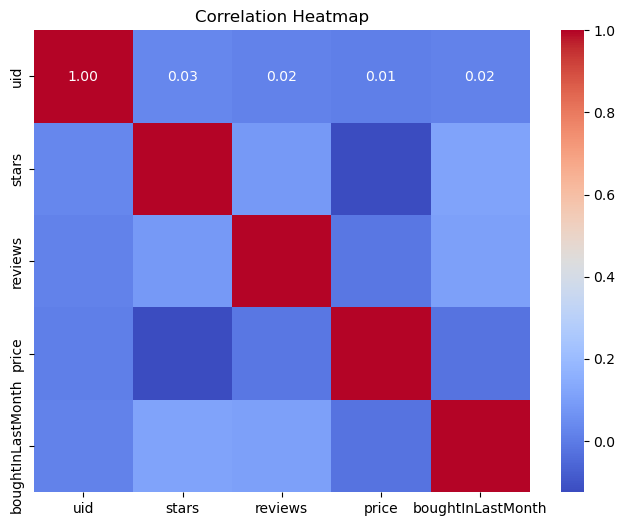

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

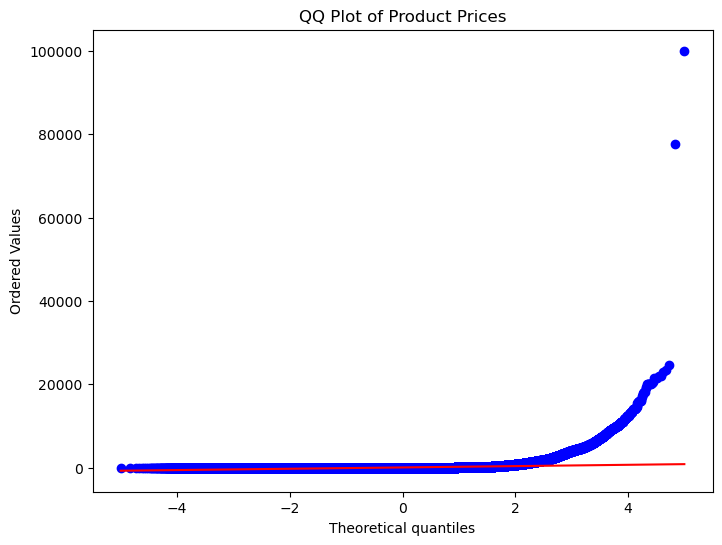

In [30]:
plt.figure(figsize=(8, 6))
stats.probplot(numeric_df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()

The scatter plot for product ratings versus price shows a broad range of prices across all ratings, with many products clustered at the lower price end. There isn't a clear trend, suggesting a weak negative correlation, and some high-priced products appear to be outliers.

The correlation heatmap indicates no strong linear relationship between the user ID, product ratings, number of reviews, price, and recent purchase activity. The variables appear to be mostly independent of each other.

The QQ plot reveals that product prices are not normally distributed. Instead, they show a right-skewed distribution, meaning there are a few products with prices much higher than the rest, suggesting the presence of outliers.